# Business Problem

We are an Indian telecom company selling phone subscriptions to customers. We have seen a rise in the amount of customers who are churning and would like to know why this might be the case and what we can do about it.  

# Data Collection

We collect customer churn data from a kaggle dataset, which contains an indicator for whether or not the customer has churned. 

In [981]:
# Installing packages
!pip install opendatasets -q

In [982]:
import opendatasets as od

# Downloading kaggle dataset
od.download("https://www.kaggle.com/datasets/suraj520/telecom-churn-dataset/data")

Skipping, found downloaded files in ".\telecom-churn-dataset" (use force=True to force download)


In [983]:
import pandas as pd

# Converting the .csv file to a pandas DataFrame and limiting the data to 10000 rows
churn_original = pd.read_csv("telecom-churn-dataset/telecom_churn.csv")
churn_original.shape

(243553, 14)

In [984]:
# Reducing the size of the dataset for performance
churn_df = churn_original.sample(10000, random_state=42)
churn_df.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
230796,230797,Airtel,M,20,Tamil Nadu,Delhi,285677,2023-03-01,2,104752,38,47,1687,0
191985,191986,Vodafone,F,68,Uttarakhand,Delhi,679704,2022-08-18,2,71706,43,33,991,0
18778,18779,Vodafone,M,30,Goa,Mumbai,837926,2020-04-03,4,137473,-2,12,6803,0
241016,241017,Vodafone,M,22,Madhya Pradesh,Chennai,679346,2023-04-21,0,58245,32,11,2832,0
136494,136495,Reliance Jio,M,63,Tripura,Bangalore,839738,2021-11-14,4,73740,68,11,5375,0


In [985]:
# Checking that we just have 10000 rows in the dataframe
churn_df.shape

(10000, 14)

In [986]:
# Definition of attributes
# - customer_id: Unique identifier for each customer.
# - telecom_partner: The telecom partner associated with the customer.
# - gender: The gender of the customer.
# - age: The age of the customer.
# - state: The Indian state in which the customer is located.
# - city: The city in which the customer is located.
# - pincode: The pincode of the customer's location.
# - date_of_registration: The date on which the customer registered with the telecom partner.
# - num_dependents: The number of dependents (e.g. children) the customer has.
# - estimated_salary: The customer's estimated salary.
# - calls_made: The number of calls made by the customer.
# - sms_sent: The number of SMS messages sent by the customer.
# - data_used: The amount of data used by the customer.
# - churn: Binary variable indicating whether the customer has churned or not (1 = churned, 0 = not churned).

### Data Collection Overview
- We load the data from a kaggle dataset
- The dataset contains more than 200.000 rows, which can be quite computationally slow to work with, so to ensure performance we reduce it to a sample of 10.000. 
- We notice that calls_made has a negative value of -2, which is not a realistic number. The lowest number of calls should be 0, indicating that the customer has made no calls at all. 

# Data Understanding: Exploratory Data Analysis (EDA)

We explore the distributions of features and the relationships between features and churning. 

In [990]:
# Checking for null values and data types of attributes
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 230796 to 219901
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           10000 non-null  int64 
 1   telecom_partner       10000 non-null  object
 2   gender                10000 non-null  object
 3   age                   10000 non-null  int64 
 4   state                 10000 non-null  object
 5   city                  10000 non-null  object
 6   pincode               10000 non-null  int64 
 7   date_of_registration  10000 non-null  object
 8   num_dependents        10000 non-null  int64 
 9   estimated_salary      10000 non-null  int64 
 10  calls_made            10000 non-null  int64 
 11  sms_sent              10000 non-null  int64 
 12  data_used             10000 non-null  int64 
 13  churn                 10000 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1.1+ MB


In [1152]:
# Changing the data type of date_of_registration to datetime and confirming the change
churn_df["date_of_registration"] = pd.to_datetime(churn_df["date_of_registration"])
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 230796 to 219901
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_id           10000 non-null  int64         
 1   telecom_partner       10000 non-null  object        
 2   gender                10000 non-null  object        
 3   age                   10000 non-null  int64         
 4   state                 10000 non-null  object        
 5   city                  10000 non-null  object        
 6   pincode               10000 non-null  int64         
 7   date_of_registration  10000 non-null  datetime64[ns]
 8   num_dependents        10000 non-null  int64         
 9   estimated_salary      10000 non-null  int64         
 10  calls_made            10000 non-null  int64         
 11  sms_sent              10000 non-null  int64         
 12  data_used             10000 non-null  int64         
 13  churn          

In [991]:
# Investigating the statistical distribution of attributes
churn_df.describe()

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,122032.291000,45.647700,548632.559600,1.972000,84996.005400,48.537900,23.831100,5007.241400,0.199100
std,70009.038314,16.421734,259407.869696,1.414078,37166.153934,29.417904,14.651124,2941.040747,0.399343
min,13.000000,18.000000,100176.000000,0.000000,20001.000000,-10.000000,-5.000000,-962.000000,0.000000
25%,61219.500000,32.000000,325073.000000,1.000000,53294.500000,24.000000,11.000000,2519.750000,0.000000
50%,122005.500000,46.000000,547532.000000,2.000000,85204.500000,48.000000,24.000000,5005.500000,0.000000
75%,182122.500000,60.000000,771495.750000,3.000000,117152.500000,74.000000,36.000000,7490.750000,0.000000
max,243476.000000,74.000000,999974.000000,4.000000,149993.000000,108.000000,53.000000,10964.000000,1.000000


In [992]:
# Calculating the count of negative values for calls_made, sms_sent and data_used
print((churn_df["calls_made"] < 0).sum())
print((churn_df["sms_sent"] < 0).sum())
print((churn_df["data_used"] < 0).sum())

272
289
243


In [993]:
# Imputing negative values with 0 and confirming that the new minimum values are 0
churn_df["calls_made"] = churn_df["calls_made"].clip(lower=0)
churn_df["sms_sent"] = churn_df["sms_sent"].clip(lower=0)
churn_df["data_used"] = churn_df["data_used"].clip(lower=0)
churn_df.describe()

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,122032.291000,45.647700,548632.559600,1.972000,84996.005400,48.650500,23.902100,5015.482300,0.199100
std,70009.038314,16.421734,259407.869696,1.414078,37166.153934,29.220218,14.527265,2926.243285,0.399343
min,13.000000,18.000000,100176.000000,0.000000,20001.000000,0.000000,0.000000,0.000000,0.000000
25%,61219.500000,32.000000,325073.000000,1.000000,53294.500000,24.000000,11.000000,2519.750000,0.000000
50%,122005.500000,46.000000,547532.000000,2.000000,85204.500000,48.000000,24.000000,5005.500000,0.000000
75%,182122.500000,60.000000,771495.750000,3.000000,117152.500000,74.000000,36.000000,7490.750000,0.000000
max,243476.000000,74.000000,999974.000000,4.000000,149993.000000,108.000000,53.000000,10964.000000,1.000000


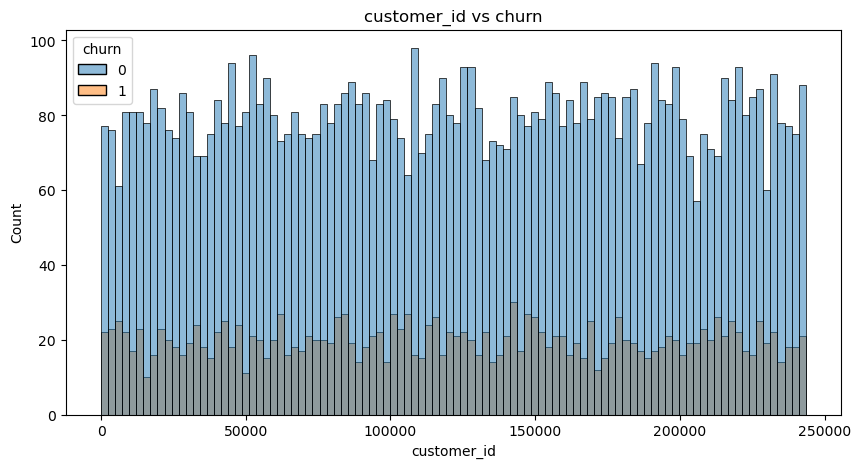

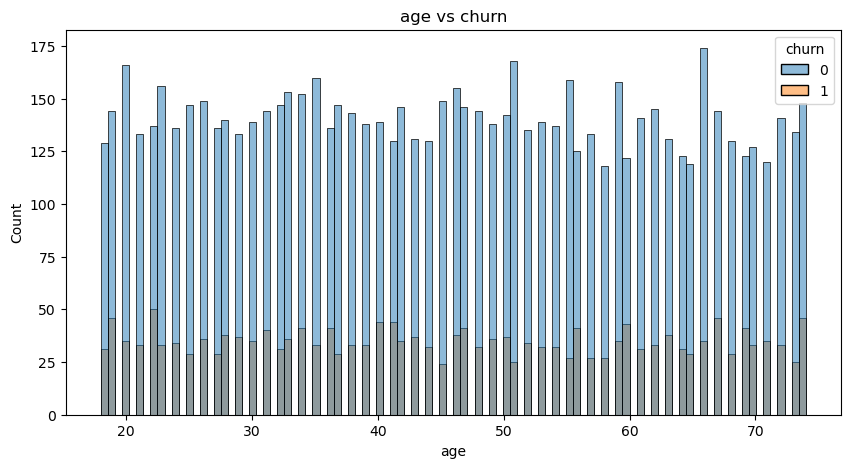

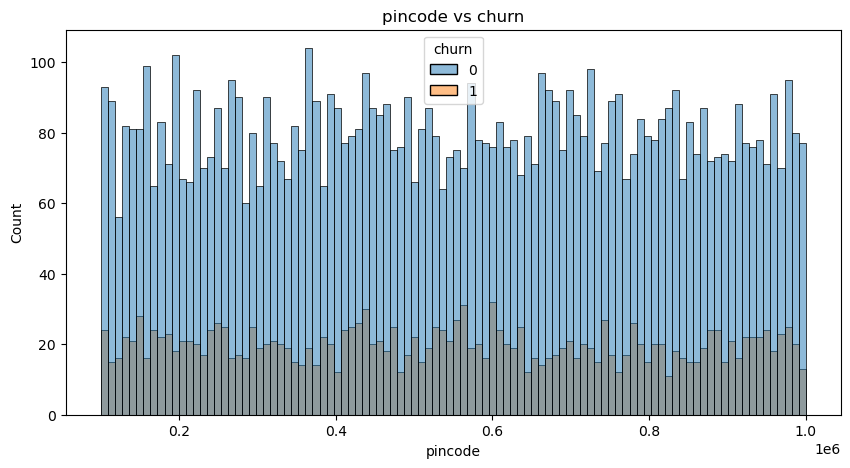

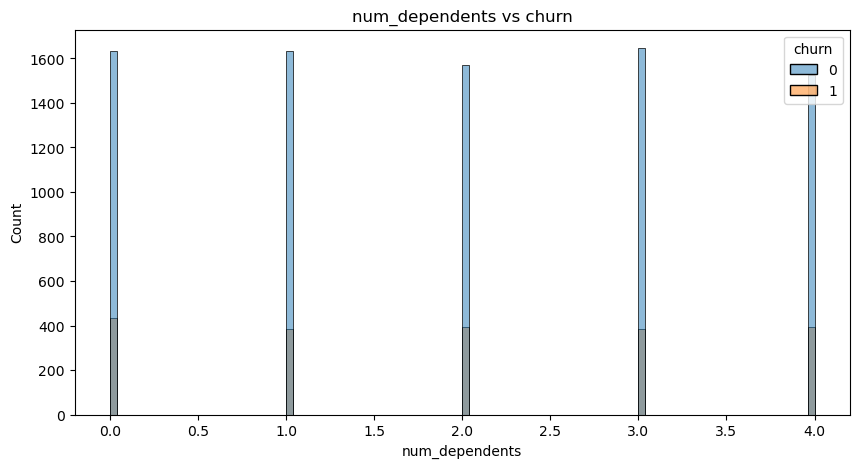

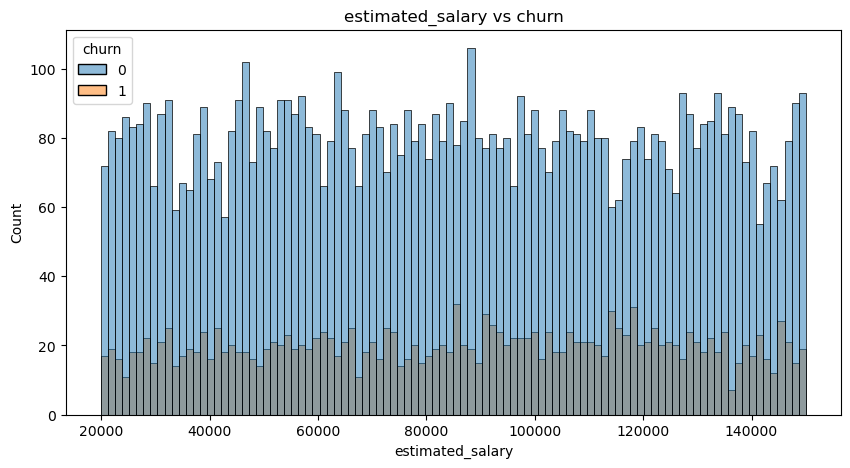

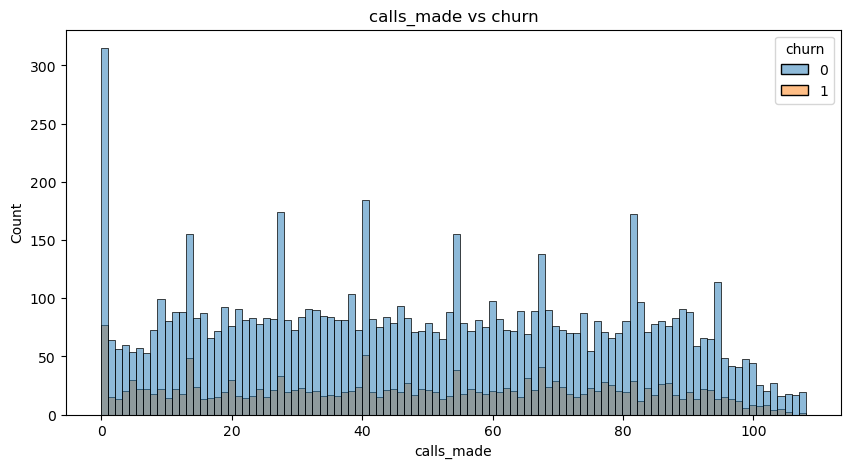

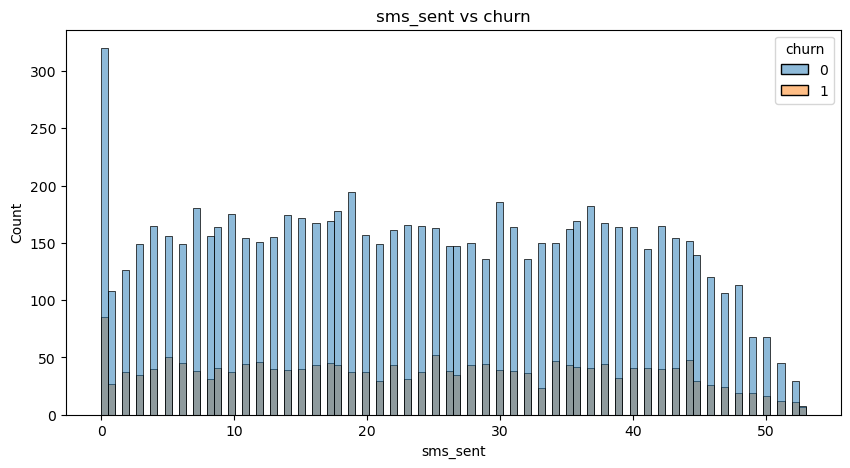

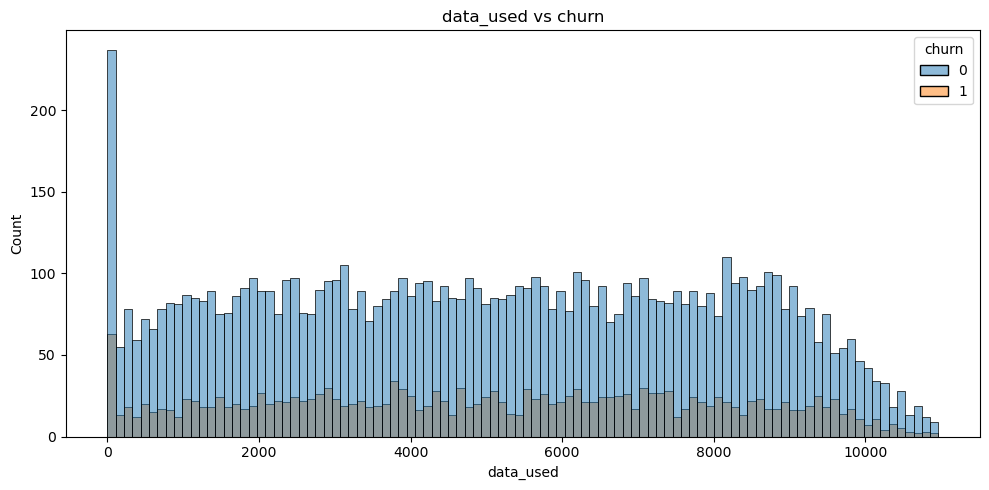

In [994]:
# Making a histogram for each numerical column compared to churn
import matplotlib.pyplot as plt
import seaborn as sns

for column in churn_df.drop("churn", axis=1).select_dtypes(include="number").columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=churn_df, x=column, hue="churn", bins=100)
    plt.title(f"{column} vs churn")

plt.tight_layout()
plt.show()

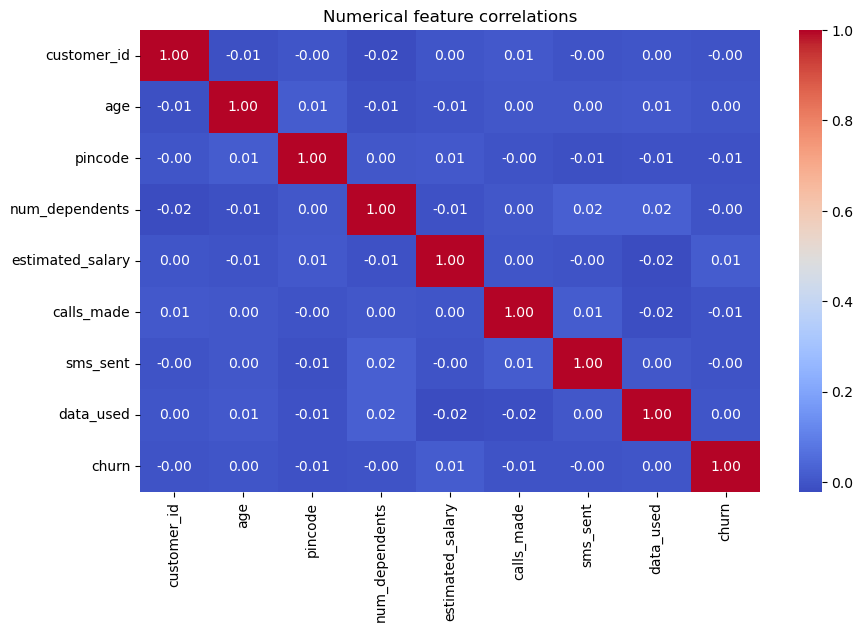

In [995]:
# Heatmap of numerical feature correlations with churn
numerical_df = churn_df.select_dtypes(include="number")

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Numerical feature correlations")
plt.show()

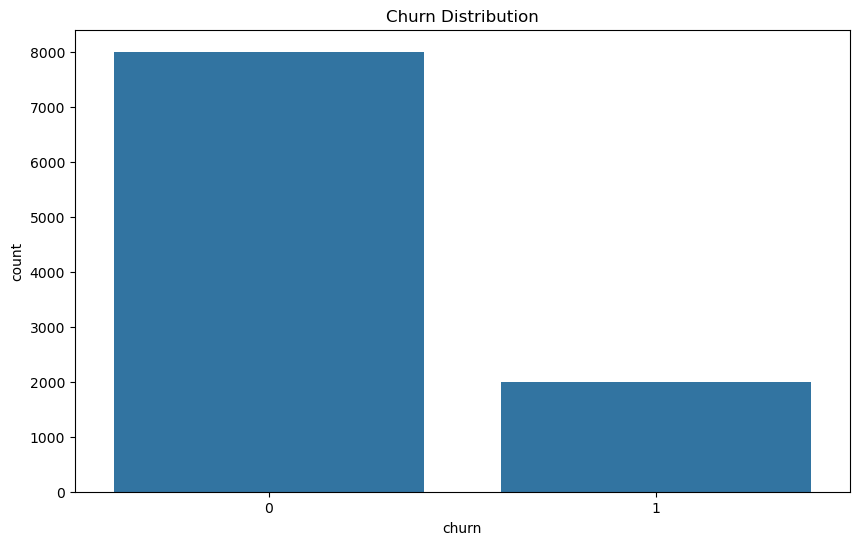

In [996]:
# Showing distribution of churn
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_df, x="churn")
plt.title("Churn Distribution")
plt.show()

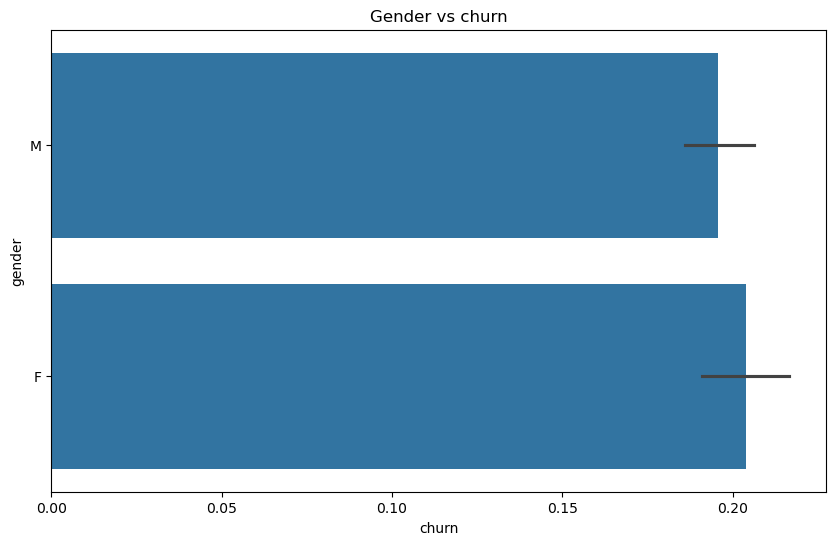

In [997]:
# Gender vs churn
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_df, x="churn", y="gender")
plt.title("Gender vs churn")
plt.show()

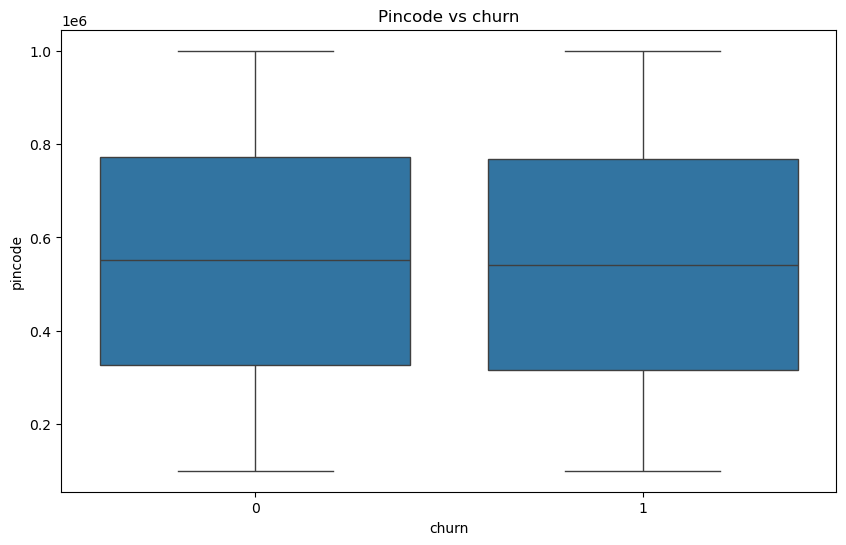

In [998]:
# Estimated salary vs churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=churn_df, x="churn", y="pincode")
plt.title("Pincode vs churn")
plt.show()

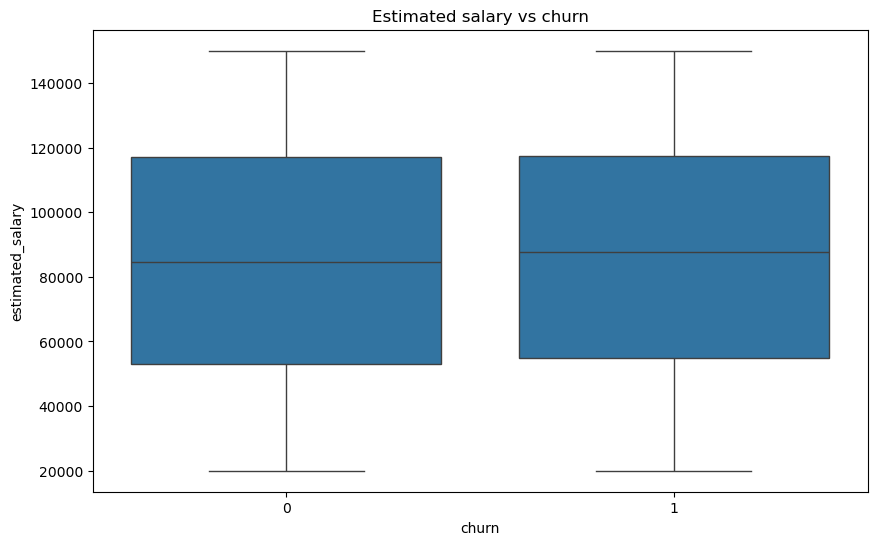

In [999]:
# Estimated salary vs churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=churn_df, x="churn", y="estimated_salary")
plt.title("Estimated salary vs churn")
plt.show()

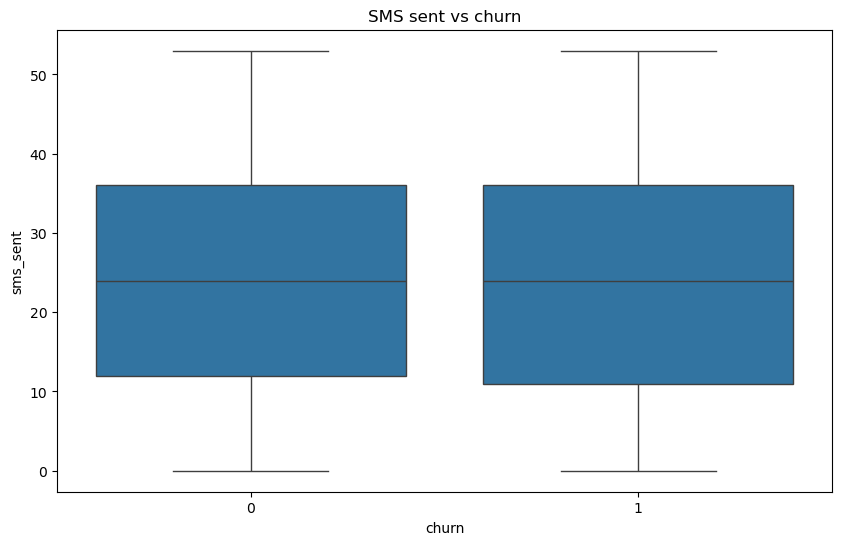

In [1000]:
# SMS sent vs churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=churn_df, x="churn", y="sms_sent")
plt.title("SMS sent vs churn")
plt.show()

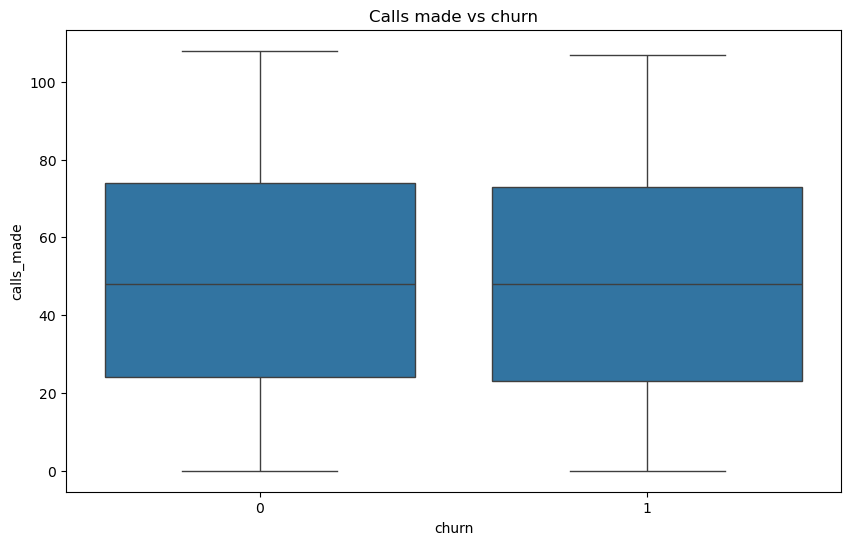

In [1001]:
# Calls made vs churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=churn_df, x="churn", y="calls_made")
plt.title("Calls made vs churn")
plt.show()

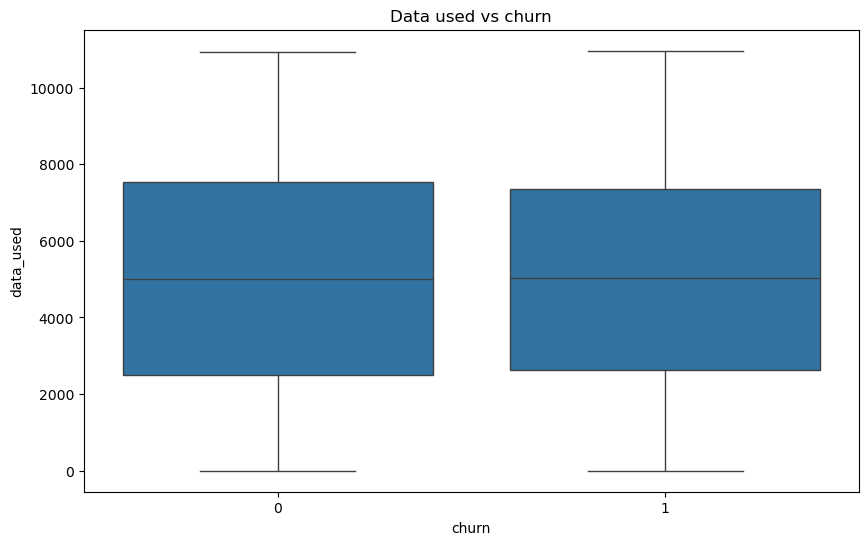

In [1002]:
# Data used vs churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=churn_df, x="churn", y="data_used")
plt.title("Data used vs churn")
plt.show()

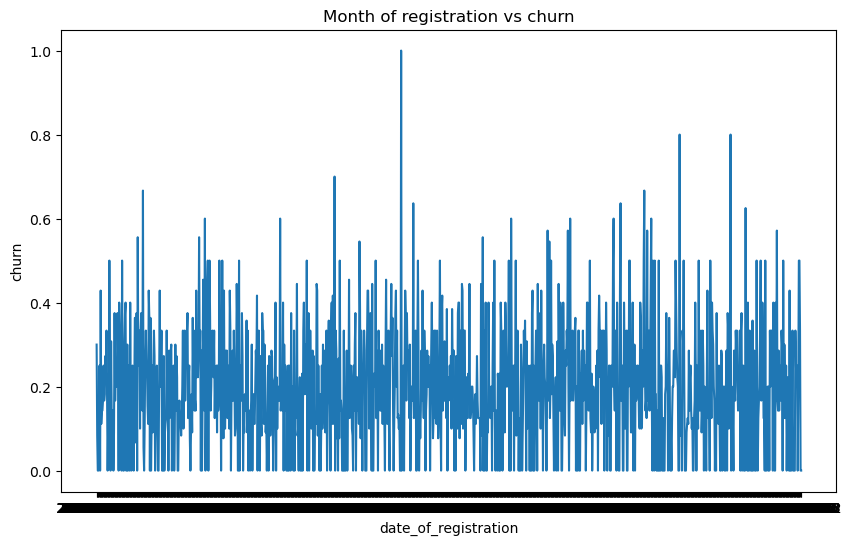

In [1003]:
# date of registration vs churn
plt.figure(figsize=(10, 6))
sns.lineplot(data=churn_df, x="date_of_registration", y="churn", errorbar=None)
plt.title("Month of registration vs churn")
plt.show()

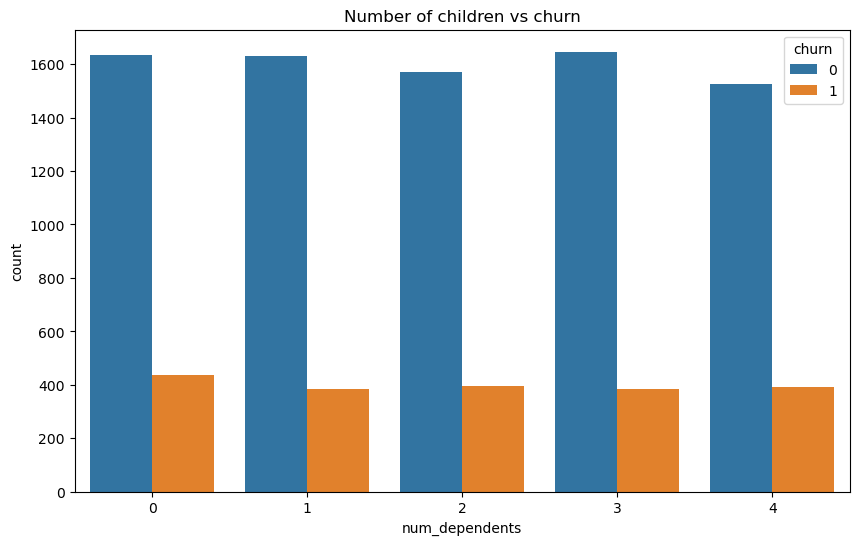

In [1004]:
# Number of children vs churn
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_df, x="num_dependents", hue="churn")
plt.title("Number of children vs churn")
plt.show()

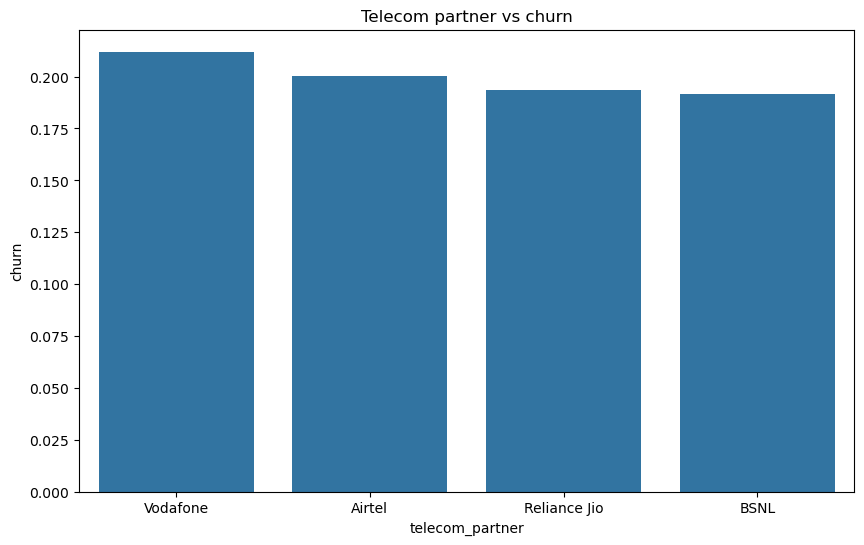

In [1005]:
# Telecom partner vs churn
plt.figure(figsize=(10, 6))
telecom_churn = churn_df.groupby("telecom_partner", as_index=False)["churn"].mean().sort_values(by="churn", ascending=False)
sns.barplot(data=telecom_churn, x="telecom_partner", y="churn")
plt.title("Telecom partner vs churn")
plt.show()

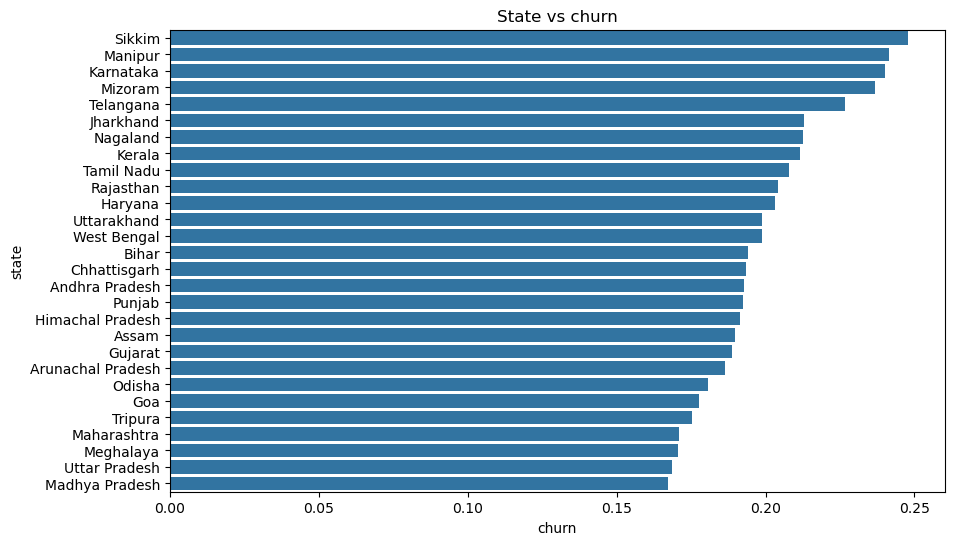

In [1006]:
# State vs churn
plt.figure(figsize=(10, 6))
state_churn = churn_df.groupby("state", as_index=False)["churn"].mean().sort_values(by="churn", ascending=False)
sns.barplot(data=state_churn, x="churn", y="state")
plt.title("State vs churn")
plt.show()

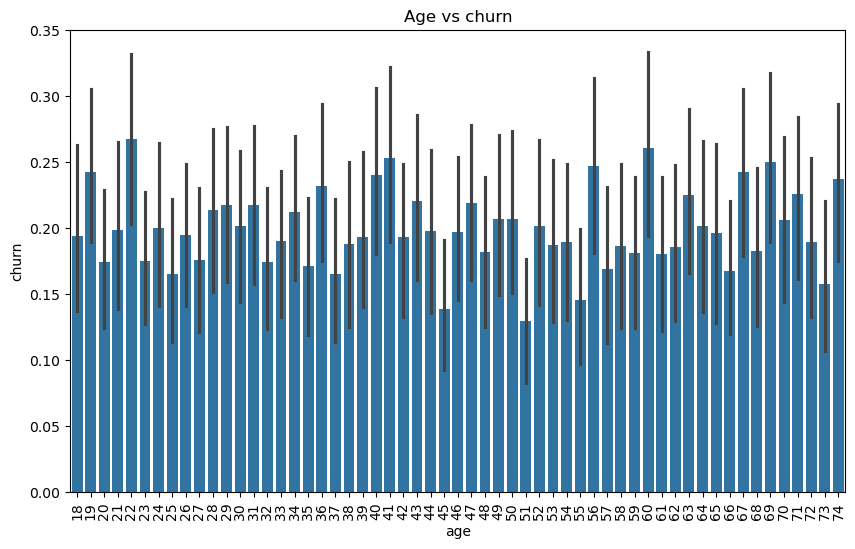

In [1007]:
# Age vs churn
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_df, x="age", y="churn")
plt.xticks(rotation=90)
plt.title("Age vs churn")
plt.show()

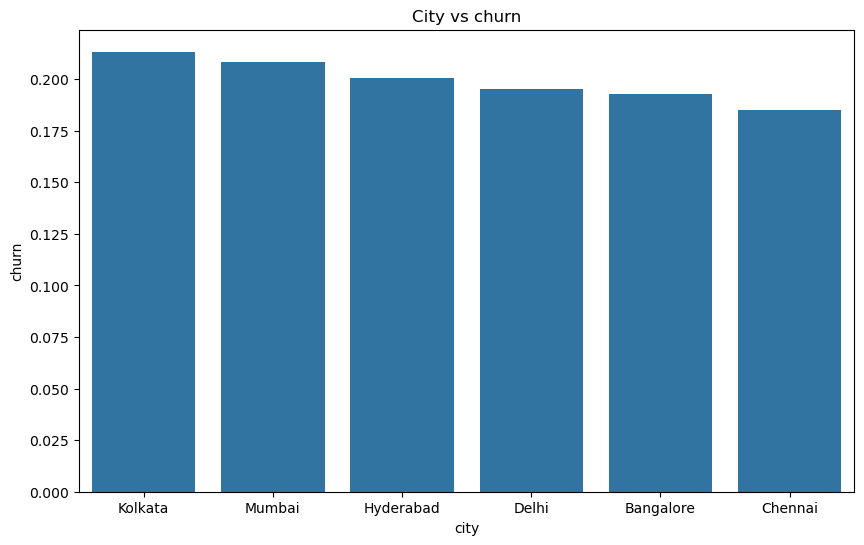

In [1008]:
# City vs churn
plt.figure(figsize=(10, 6))
city_churn = churn_df.groupby("city", as_index=False)["churn"].mean().sort_values(by="churn", ascending=False)
sns.barplot(data=city_churn, x="city", y="churn")
plt.title("City vs churn")
plt.show()

### EDA Overview
- The dataset has no null values.
- We change the data type of date_of_registration to datetime format.
- About 2-3% of calls_made, sms_sent and data_used were negative. A possible reason for this might be that customers used their phone subscription so little, that their budgets overflowed from the previous month to the next, or that they received a package of free calls, sms' or data usage to be spent at their leisure. Regardless we reduce these values to a lower bound of 0, since it is not realistic to have a negative number of calls.   
- All features seem to only have a minor correlation with churn, with the highest correlations being with pincode, estimated_salary and calls_made at about 0.01 correlation.
- We see that on average 20% of people churn and 80% do not churn.
- Women and customers with 0 children are more likely to churn.
- The telecom partner Vodafone has the highest churn rate at a little above average at about 21%.
- The state of Sikkim has the highest average churn rate of all states at 25%.
- The age of customers least likely to churn is 51 with a churn rate of about 13%, and the most likely to churn is 22 with a churn rate of about 26%. A 22 year old is therefore twice as likely to churn as a 51 year old. 
- The city of Kolkata has the highest churn rate at about 21%.

# Data Preprocessing

We address missing and invalid values, remove any duplicates or outliers found during EDA and ensure we have the necessary features needed for machine learning.  

In [1162]:
# Ensuring that there are no missing values
churn_df.isnull().sum()

customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
data_used_bracket       0
salary_bracket          0
month                   0
dtype: int64

In [1013]:
# Checking for duplicates
churn_df.duplicated().sum()

0

In [1014]:
# Checking for invalid ages
invalid_ages = churn_df[churn_df["age"] < 0]
invalid_ages

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn


In [1172]:
# Checking for invalid churn values
churn_df["churn"].unique()

array([0, 1], dtype=int64)

In [1016]:
# Ensuring no string values have leading or trailing spaces
churn_df = churn_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [1017]:
# Checking for high cardinality values to inform feature engineering
churn_df.nunique()

customer_id             10000
telecom_partner             4
gender                      2
age                        57
state                      28
city                        6
pincode                  9962
date_of_registration     1218
num_dependents              5
estimated_salary         9636
calls_made                109
sms_sent                   54
data_used                6302
churn                       2
dtype: int64

In [1018]:
# Making an aggregate data used feature to separate people into low salary, mid salary and high salary
data_used_categories = ["low", "mid", "high"]

def categorize_data_used(data_used):
    if data_used < 3700:
        return data_used_categories[0]
    elif 3700 <= data_used < 7400:
        return data_used_categories[1]
    else:
        return data_used_categories[2]

churn_df["data_used_bracket"] = churn_df["data_used"].apply(categorize_data_used)
churn_df["data_used_bracket"] = pd.Categorical(churn_df["data_used_bracket"], categories = data_used_categories, ordered=True)
churn_df["data_used_bracket"].head()

230796    low
191985    low
18778     mid
241016    low
136494    mid
Name: data_used_bracket, dtype: category
Categories (3, object): ['low' < 'mid' < 'high']

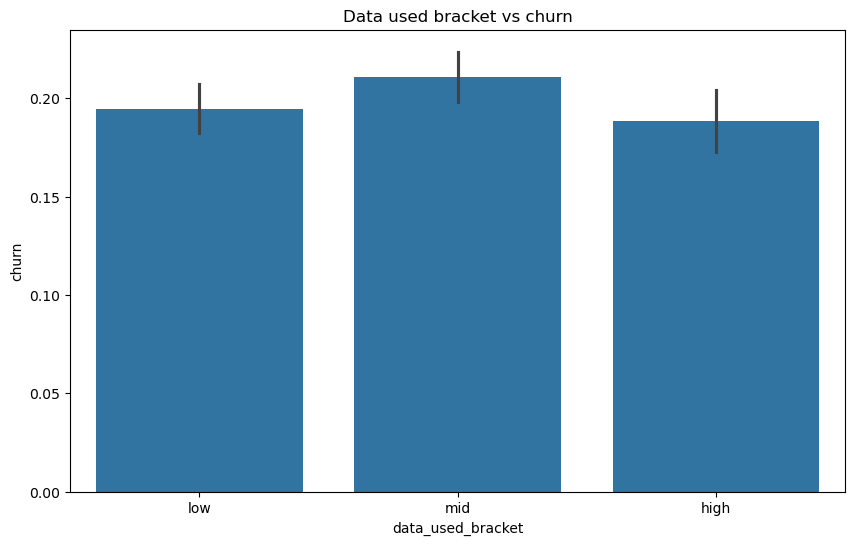

In [1019]:
# data used bracket vs churn
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_df, x="data_used_bracket", y="churn")
plt.title("Data used bracket vs churn")
plt.show()

In [1020]:
# Making an aggregate estimated salary feature to separate people into low salary, mid salary and high salary
salary_categories = ["low", "mid", "high"]

def categorize_salary(salary):
    if salary < 50000:
        return salary_categories[0]
    elif 50000 <= salary < 100000:
        return salary_categories[1]
    else: 
        return salary_categories[2]

churn_df["salary_bracket"] = churn_df["estimated_salary"].apply(categorize_salary)
churn_df["salary_bracket"] = pd.Categorical(churn_df["salary_bracket"], categories = salary_categories, ordered=True)
churn_df["salary_bracket"].head()

230796    high
191985     mid
18778     high
241016     mid
136494     mid
Name: salary_bracket, dtype: category
Categories (3, object): ['low' < 'mid' < 'high']

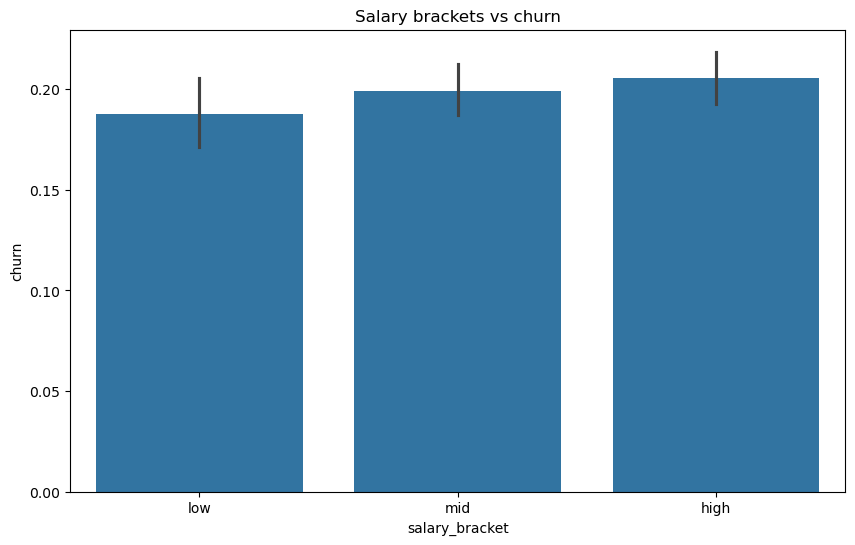

In [1021]:
# Salary bracket vs churn
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_df, x="salary_bracket", y="churn")
plt.title("Salary brackets vs churn")
plt.show()

In [1022]:
# Checking the distribution of dates
max_date = churn_df["date_of_registration"].max()
min_date = churn_df["date_of_registration"].min()

print(max_date)
print(min_date)
print(max_date-min_date)

2023-05-03 00:00:00
2020-01-01 00:00:00
1218 days 00:00:00


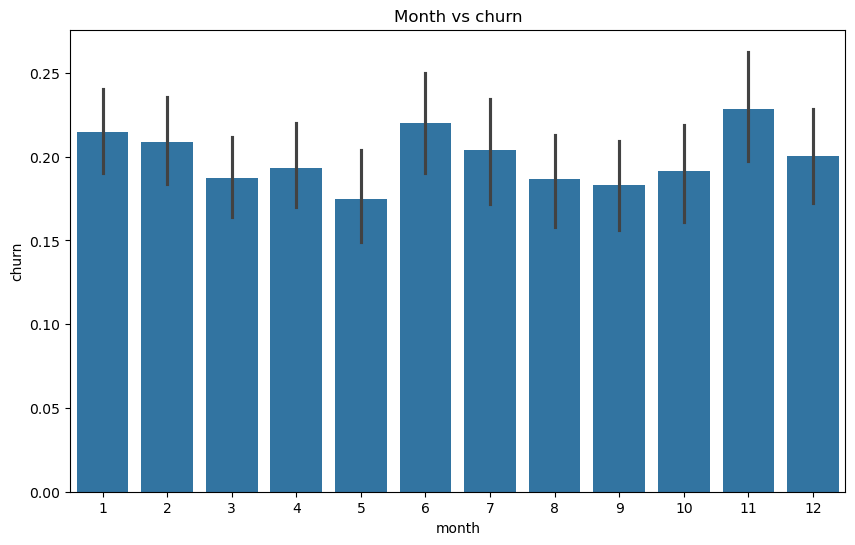

In [1024]:
# Making an aggregate date feature, to separate dates into months
churn_df["month"] = churn_df["date_of_registration"].dt.month

plt.figure(figsize=(10, 6))
sns.barplot(data=churn_df, x="month", y="churn")
plt.title("Month vs churn")
plt.show()

In [1025]:
# Checking number of unique values for each attribute
churn_df.nunique()

customer_id             10000
telecom_partner             4
gender                      2
age                        57
state                      28
city                        6
pincode                  9962
date_of_registration     1218
num_dependents              5
estimated_salary         9636
calls_made                109
sms_sent                   54
data_used                6302
churn                       2
data_used_bracket           3
salary_bracket              3
month                      12
dtype: int64

In [1026]:
# Removing high cardinality features from the DataFrame
churn_clean_df = churn_df.copy()
churn_clean_df.drop(["customer_id", "pincode", "estimated_salary", "data_used", "date_of_registration"], axis=1, inplace=True)
churn_clean_df.nunique()

telecom_partner        4
gender                 2
age                   57
state                 28
city                   6
num_dependents         5
calls_made           109
sms_sent              54
churn                  2
data_used_bracket      3
salary_bracket         3
month                 12
dtype: int64

In [1027]:
# Checking the updated list of attributes
churn_clean_df.columns

Index(['telecom_partner', 'gender', 'age', 'state', 'city', 'num_dependents',
       'calls_made', 'sms_sent', 'churn', 'data_used_bracket',
       'salary_bracket', 'month'],
      dtype='object')

### Data Preprocessing Overview
- There are no duplicates, missing or invalid values in the dataset
- We keep the aggregated features salary, data used and month, since they all show clear variations. 
- We drop high cardinality features to ensure machine learning models generalize, rather than memorize, reducing the likelihood of overfitting.

# Model Training and Evaluation

We train machine learning models to predict which customers will churn. 

In [1031]:
# Installing packages
!pip install xgboost -q

In [1035]:
# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report

# Preprocessing and transformers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Pipeline
from sklearn.pipeline import Pipeline

# Splitting the data into training and test data, choosing features based on iterative model performance
X = churn_clean_df.drop(["churn", "salary_bracket"], axis=1)
y = churn_clean_df["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Calculating class_weight_ratio for the XGBClassifier model
class_weight_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Numerical features
num_features = X.select_dtypes(include="number").columns

# Ordinal categorical features
ord_mapping = {
    "data_used_bracket": ["low", "mid", "high"]
}

ordinal_encoder = OrdinalEncoder(
    categories=[ord_mapping["data_used_bracket"]]
)

ord_features = ["data_used_bracket"]

# Nominal categorical features
cat_features = X.select_dtypes(include=["object", "category"]).columns
nom_features = [feature for feature in cat_features if feature not in ord_features]

In [1036]:
# Transforming categorical features to numerical features for universal machine learning model compatibility
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_features),
        ("ord", ordinal_encoder, ord_features),
        ("cat", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), nom_features)
    ]
)

In [1037]:
# Defining pipelines for model training and evaluation
models = {
    "Logistic Regression": Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(random_state=42))
    ]), 
    "Decision Tree": Pipeline([
        ("preprocessor", preprocessor), 
        ("classifier", DecisionTreeClassifier(random_state=42))
    ]), 
    "Random Forest": Pipeline([
        ("preprocessor", preprocessor), 
        ("classifier", RandomForestClassifier(random_state=42))
    ]), 
    "Gradient Boosting": Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", GradientBoostingClassifier(random_state=42))
    ]), 
    "SVM": Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", SVC(random_state=42))
    ]),
    "XGBoost": Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", XGBClassifier(random_state=42))
    ]),
}

In [1038]:
# Defining hyperparameter grids for classification machine learning models
param_grids = {   
    "Logistic Regression": {
        "classifier__C": [0.1, 1, 10], 
        "classifier__solver": ["liblinear", "saga"], 
        "classifier__class_weight": ["balanced", None]
        },
    "Decision Tree": {
        "classifier__max_depth": [3, 5, 7, 10, 15, 20], 
        "classifier__min_samples_split": [2, 5, 10], 
        "classifier__class_weight": ["balanced", None]
        },
    "Random Forest": {
        "classifier__n_estimators": [100, 200, 300], 
        "classifier__max_depth": [10, 20, 30], 
        "classifier__class_weight": ["balanced", None]
        },
    "Gradient Boosting": {
        "classifier__n_estimators": [100, 200, 300], 
        "classifier__learning_rate": [0.01, 0.1, 0.5, 1], 
        "classifier__subsample": [0.8, 1.0], 
        "classifier__max_depth": [3, 5, 7]
        },
    "SVM": {
        "classifier__C": [0.1, 1, 10], 
        "classifier__kernel": ["linear", "rbf"], 
        "classifier__class_weight": ["balanced", None]
        },
    "XGBoost": {
        "classifier__n_estimators": [100, 200, 300], 
        "classifier__learning_rate": [0.01, 0.1, 0.5, 1],
        "classifier__subsample": [0.8, 1.0], 
        "classifier__max_depth": [3, 5, 7], 
        "classifier__colsample_bytree": [0.8, 1.0]
        }
}

In [1039]:
# Using GridSearchCV to find the best model
best_models = {}

for model_name, model_pipeline in models.items():
    print(f"Training {model_name}...")

    # Accessing the hyperparameter grid for the current model
    param_grid = param_grids[model_name]

    # Performing grid search
    grid_search = GridSearchCV(model_pipeline, param_grid, cv=StratifiedKFold(n_splits=5), 
                               n_jobs=-1, verbose=1, scoring="f1")
    grid_search.fit(X_train, y_train)

    # Storing the best model
    best_models[model_name] = grid_search.best_estimator_

    # Evaluating the best model on the test set
    y_pred = grid_search.predict(X_test)

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"\nClassification report for {model_name}:\n{classification_report(y_test, y_pred, zero_division=1)}")

Training Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Logistic Regression: {'classifier__C': 0.1, 'classifier__class_weight': 'balanced', 'classifier__solver': 'liblinear'}

Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.55      0.65      1602
           1       0.21      0.47      0.29       398

    accuracy                           0.54      2000
   macro avg       0.51      0.51      0.47      2000
weighted avg       0.69      0.54      0.58      2000

Training Decision Tree...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Decision Tree: {'classifier__class_weight': 'balanced', 'classifier__max_depth': 10, 'classifier__min_samples_split': 2}

Classification report for Decision Tree:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1602
           1 

C:\ProgramData\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for XGBoost: {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}

Classification report for XGBoost:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1602
           1       0.24      0.19      0.21       398

    accuracy                           0.72      2000
   macro avg       0.53      0.52      0.52      2000
weighted avg       0.70      0.72      0.71      2000



In [1040]:
# Evaluation metrics for the best model
best_f1_score = 0
best_recall = 0
best_accuracy = 0

for model_name, model in best_models.items():
    # Gets the model's evaluation metrics
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    recall = report["1"]["recall"]
    f1_score = report["1"]["f1-score"]
    accuracy = accuracy_score(y_test, y_pred)

    # Prints the model's evaluation metrics
    print(f"{model_name}: Recall: {recall:.4f}, f1_score {f1_score:.4f} and accuracy: {accuracy:.4f}")
    
    # Updates the best model if conditions are met
    if f1_score > best_f1_score and accuracy > 0.7:
        best_f1_score = f1_score
        best_recall = recall
        best_accuracy = accuracy
        best_model_name = model_name
        best_model = model.named_steps["classifier"]
        best_preprocessor = model.named_steps["preprocessor"]

# Displays the best model
print(f"The best model is: {best_model_name} with recall: {best_recall:.4f}, f1_score: {best_f1_score:.4f} and accuracy: {best_accuracy:.4f}")

Logistic Regression: Recall: 0.4724, f1_score 0.2879 and accuracy: 0.5350
Decision Tree: Recall: 0.2688, f1_score 0.2324 and accuracy: 0.6465
Random Forest: Recall: 0.0905, f1_score 0.1165 and accuracy: 0.7270
Gradient Boosting: Recall: 0.1608, f1_score 0.1675 and accuracy: 0.6820
SVM: Recall: 0.5025, f1_score 0.2857 and accuracy: 0.5000
XGBoost: Recall: 0.1910, f1_score 0.2141 and accuracy: 0.7210
The best model is: XGBoost with recall: 0.1910, f1_score: 0.2141 and accuracy: 0.7210


### Model Training and Evaluation Overview
- We select an array of classifier models to test. 
- We use train_test_split to separate the data into training and testing and use stratify=y to maintain class proportions of 20% churning and 80% not churning in both training and test datasets.
- We transform all object and category features to numerical features, so that logistic regression and SVC can handle these features
- For hyperparameter tuning we use a combination of gridsearchcv, which finds the best hyperparameters and stratifiedkfold to ensure consistent class proportions in each fold that we test.
- We use a pipeline to ensure consistent transformations across all models.
- We determine that the best model is XGBoost with recall 0.1910, f1_score 0.2141 and accuracy 0.7210.

# Model Interpretation

We explain how different features contribute to the model's predictions.  

In [1044]:
# Installing packages
!pip install shap -q

In [1045]:
# Preprocesses X_train and X_test
X_train_transformed = best_preprocessor.transform(X_train)
X_test_transformed = best_preprocessor.transform(X_test)

# Gets the feature names
feature_names = best_preprocessor.get_feature_names_out()

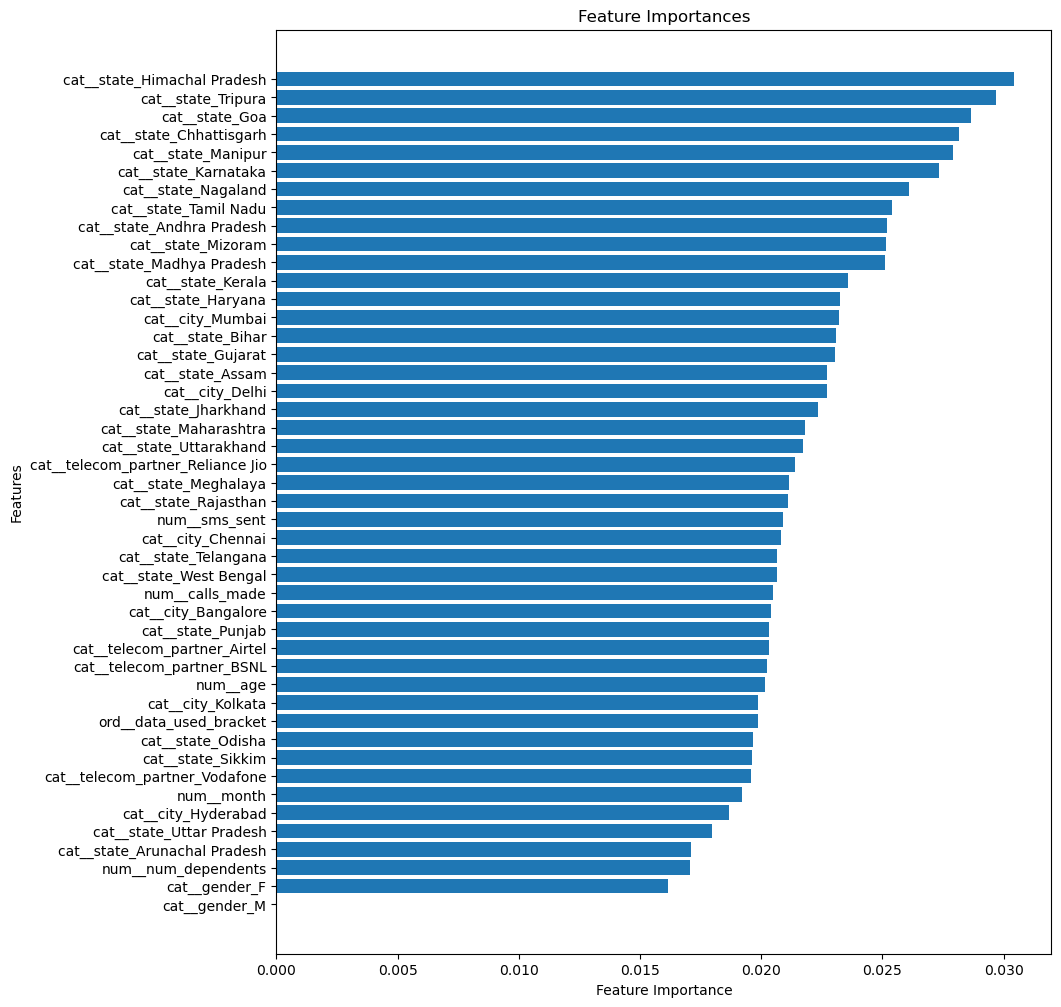

In [1095]:
# Generates a feature importance plot from the best classifier model
# Gets feature names and feature importances
feature_names = best_preprocessor.get_feature_names_out()
importances = best_model.feature_importances_

# Sorts feature names and importances
sorted_indices = importances.argsort()
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

# Plots the feature importances
plt.figure(figsize=(10, 12))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()

### Model Feature Importances
- We see that the state of Himachal Pradesh, seems to have the strongest influence on the model's predictions, contributing to about 0.03 or 3% of the model's overall decisionmaking process.
- We also notice that the 10 most impactful features are all states, which goes to show how influential the feature of states is to the model's decisionmaking process.
- On the other hand, the least influential feature seems to be gender with both male and female having the lowest feature importance and male having a feature importance of 0, indicating that the model estimates that the male gender has no influence on predicting the target variable.

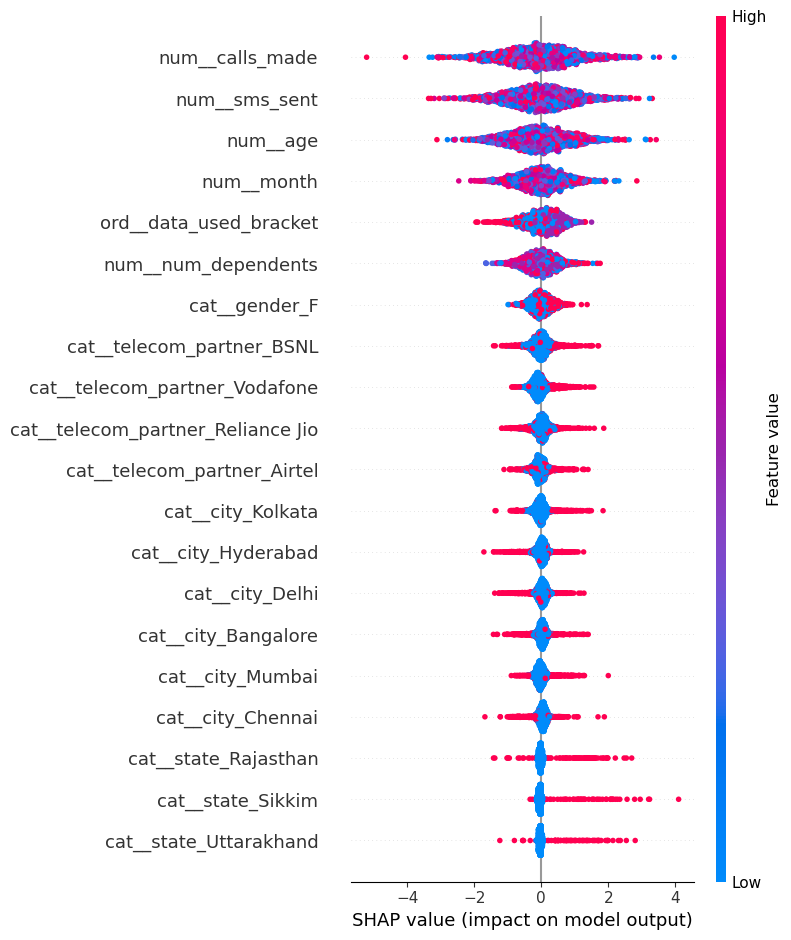

In [1103]:
# Creating the shap summary plot for global impact of features on churn
import shap

# Create a random number generator
rng = np.random.default_rng()

# Generating shap values
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test_transformed)
shap_values.feature_names = feature_names

# Creating the shap summary plot
shap.summary_plot(shap_values, X_test_transformed, rng=rng)

### SHAP Summary Plot
- Number of calls made sent has a strong impact on predictions, being able to both influence the outcome positively and negatively. We see that lower number of calls seems to primarily be associated with churning (positive shap value) and higher number of calls with not churning (negative shap value).
- Number of sms' sent are a bit more ambiguous, but generally it seems that higher values lean towards non-churning.
- Later months seem to increase the likelihood of churn, while earlier months reduce it.
- Data used very clearly increases the likelihood of churning with higher values.
- Customers with more children and females increase the likelihood of churning. 
- The state of Sikkim seems to heavily induce churn with almost exclusively positive SHAP values

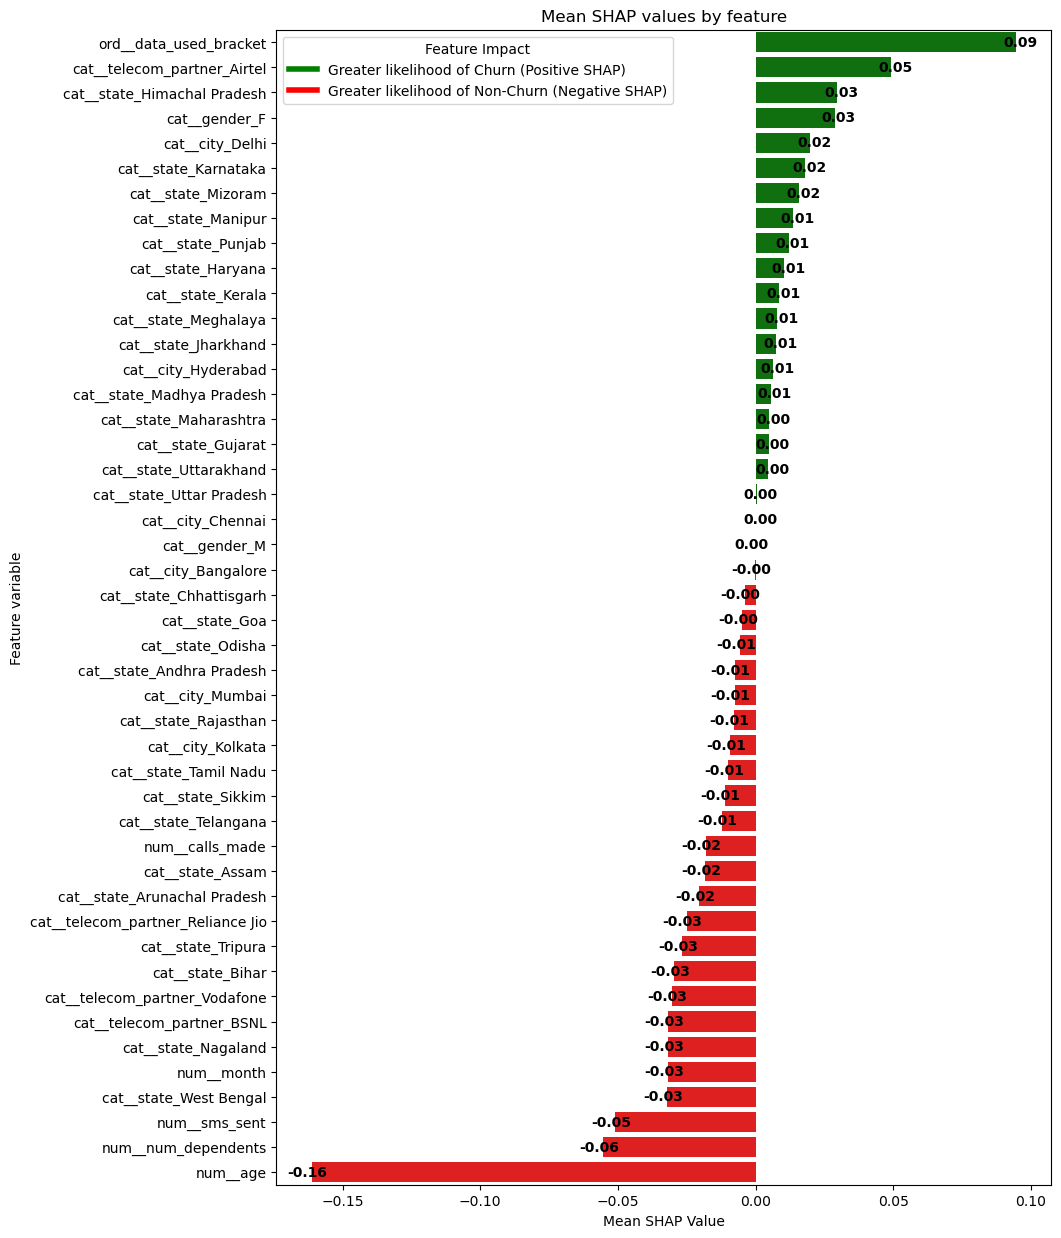

In [1191]:
# Generates the mean SHAP values for each feature
import numpy as np

# Calculates the mean SHAP values for each feature across all predictions
mean_shap_values = np.mean(shap_values.values, axis=0)

# Sorts the mean SHAP values in descending order
sorted_indices = np.argsort(mean_shap_values)[::-1]  
sorted_shap_values = mean_shap_values[sorted_indices]
sorted_features = feature_names[sorted_indices]

# Sets colors for the bars based on whether the SHAP value is positive (green) or negative (red)
colors = ["green" if value > 0 else "red" for value in sorted_shap_values]

# Creates a horizontal bar plot of the mean SHAP values for each feature
plt.figure(figsize=(10,15))
sns.barplot(x=sorted_shap_values, y=sorted_features, palette=colors, hue=sorted_features)

# Adds axis labels and title to the plot
plt.xlabel("Mean SHAP Value")
plt.ylabel("Feature variable")
plt.title("Mean SHAP values by feature")

# Creates custom legend with color labels for the bars
handles = [plt.Line2D([0], [0], color='green', lw=4), 
           plt.Line2D([0], [0], color='red', lw=4)]
labels = ['Greater likelihood of Churn (Positive SHAP)', 'Greater likelihood of Non-Churn (Negative SHAP)']
plt.legend(loc="upper left", handles=handles, labels=labels, title='Feature Impact')

# Annotates the bars with their numerical values
for i, value in enumerate(sorted_shap_values):
    # If the SHAP value is positive, display the number to the right of the bar
    if value > 0:
        plt.text(value+0.0015, i, f'{value:.2f}', ha="center", va='center', color='black', fontweight='bold')
    # If the SHAP value is negative, display the number to the left of the bar
    else:
        plt.text(value-0.0015, i, f'{value:.2f}', ha="center", va='center', color='black', fontweight='bold')

plt.show()

### Mean SHAP Values Plot
- We see that on average the features reducing the likelihood of churning most are calls made, age and number of sms' sent.
- On the other hand we see that on average the single feature which increases the likelihood of churning the most, is data used

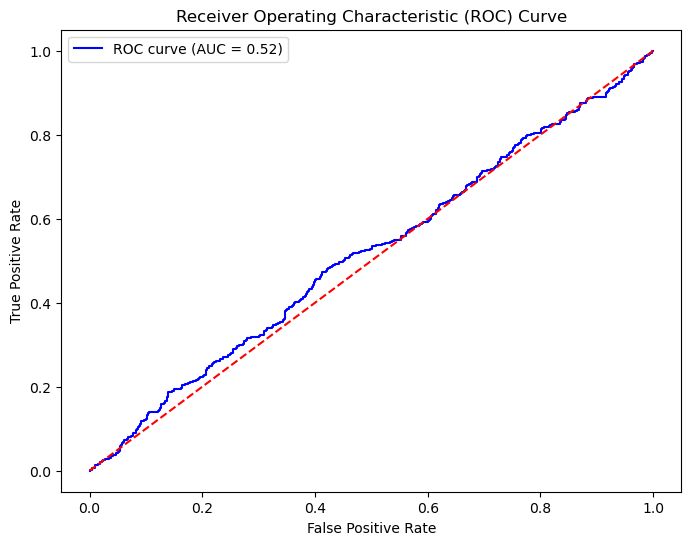

In [1109]:
from sklearn.metrics import roc_curve, auc

# Getting the predicted probabilities for the positive class (churn=1)
y_pred_prob = best_model.predict_proba(X_test_transformed)[:, 1]

# Calculating the ROC curve false positive rate and true positive rate for various thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculating the ROC curve's area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="b", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="r", linestyle="--")  # Baseline for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="best")
plt.show()

### Receiver Operating Characteristic (ROC) Curve
- We see that the area under the curve (AUC) is 0.52, indicating that the model is only slightly better than random guessing at distinguishing churning from non-churning.  
- A possible reason for this low AUC score is the weak relationship between features and the churn target variable with the highest numerical correlation being only 0.01. The model therefore seems to struggle with accurately predicting churn, due to the lack of signal in the features.  

In [1054]:
# Determines the index position of features to use for partial dependence plots
i=0
for feature in feature_names:
    print(f"{i}: {feature}")
    i += 1

0: num__age
1: num__num_dependents
2: num__calls_made
3: num__sms_sent
4: num__month
5: ord__data_used_bracket
6: cat__telecom_partner_Airtel
7: cat__telecom_partner_BSNL
8: cat__telecom_partner_Reliance Jio
9: cat__telecom_partner_Vodafone
10: cat__gender_F
11: cat__gender_M
12: cat__state_Andhra Pradesh
13: cat__state_Arunachal Pradesh
14: cat__state_Assam
15: cat__state_Bihar
16: cat__state_Chhattisgarh
17: cat__state_Goa
18: cat__state_Gujarat
19: cat__state_Haryana
20: cat__state_Himachal Pradesh
21: cat__state_Jharkhand
22: cat__state_Karnataka
23: cat__state_Kerala
24: cat__state_Madhya Pradesh
25: cat__state_Maharashtra
26: cat__state_Manipur
27: cat__state_Meghalaya
28: cat__state_Mizoram
29: cat__state_Nagaland
30: cat__state_Odisha
31: cat__state_Punjab
32: cat__state_Rajasthan
33: cat__state_Sikkim
34: cat__state_Tamil Nadu
35: cat__state_Telangana
36: cat__state_Tripura
37: cat__state_Uttar Pradesh
38: cat__state_Uttarakhand
39: cat__state_West Bengal
40: cat__city_Bangalo

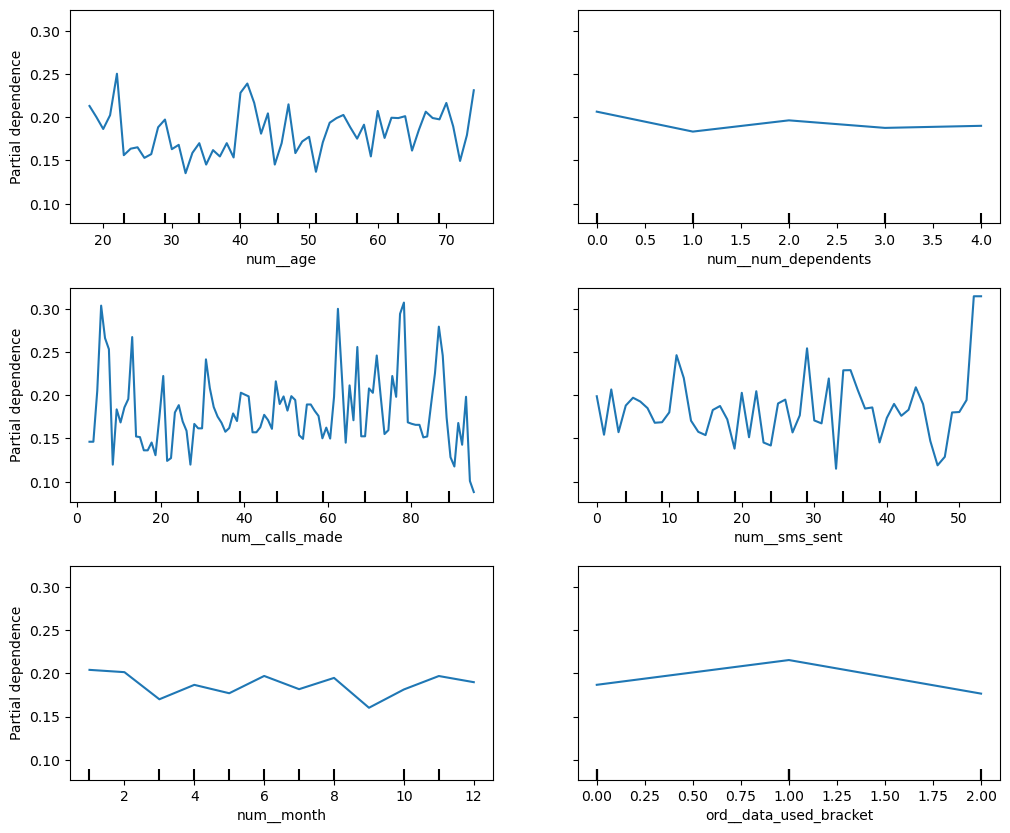

In [1117]:
# Creates the partial dependence plots for specified features
from sklearn.inspection import PartialDependenceDisplay

feature_list = [0, 1, 2, 3, 4, 5]

fig, ax = plt.subplots(figsize=(12, 10))

disp = PartialDependenceDisplay.from_estimator(
    best_model, 
    X_train_transformed, 
    features=feature_list,
    feature_names = feature_names,
    n_cols=2,
    ax=ax
)

# Increases the vertical space between the plots
plt.subplots_adjust(hspace=0.3)
plt.show()

### Partial Dependence Plots
The model predicts higher churn probabilities for the following types of customers:
- Around 20 or 40 years old
- No children
- Less than 10 calls made
- More than 50 sms' sent
- Registered in January
- Medium data usage between 3400 and 6800

The model predicts lower churn probabilities for the following types of customers:
- Around 35 or 50 years old
- One child
- More than 90 calls made
- Around 35 sms' sent
- Registered in September
- High data usage greater than 6800, or low data usage below 3400

# Model Deployment

We deploy the model to an interactive streamlit dashboard, showing a variety of visualizations.  

### Streamlit Layout Description
- A sidebar for filtering the dataset by telecom partner, gender, state and month through selection and deselection. The sidebar filtering impacts:
    - Showing the first 5 rows of the filtered dataset.
    - A churn count plot showing the distribution between churning and not churning for the filtered data.
    - An age histogram showing the distribution of ages for the filtered data.
- SHAP feature importances plot for showing the impact of different features on a single prediction.
    - Specify a prediction to plot by writing an index number.
- SHAP feature dependence plot that shows the overall distribution of churn for a specific feature's values.
    - Specify a feature to plot by selecting the feature's name.

### Using the streamlit app
- The app is accessible by a link in the project's github repository, in the readme.md file, under the model deployment section.
- First time the app is loaded it may take some time, due to extensive computation of calculating SHAP values.
- After initial loading the app can be interacted with in real-time due to caching of computationally expensive operations.

In [1139]:
# Saving variables for the streamlit app (streamlit_dashboard.py)
churn_clean_df.to_parquet("data/cleaned_churn_data.parquet", index=False)
joblib.dump(best_model, "data/best_model.pkl")
joblib.dump(X_train_transformed, "data/X_train_transformed.pkl")
joblib.dump(X_test_transformed, "data/X_test_transformed.pkl")
joblib.dump(feature_names, "data/feature_names.pkl")

['data/feature_names.pkl']

### Model Deployment Overview
We make an interactive streamlit dashboard with the following features:
- Sidebar filters to filter the data by.
- The first 5 rows of the filtered dataset.
- The churn distribution for the filtered data.
- The age distribution for the filtered data.
- A SHAP feature importances plot for a single prediction.
- A SHAP feature dependence plot for all predictions.

Using the app:
 - The app is accessed by link and performs well with cached data that enables one time loading and subsequent real-time interactive analysis. 